# 🎵 MelodyMetrics: Refined Visualizations
This notebook presents refined and high-impact visualizations for analyzing Spotify music data.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

plt.style.use('seaborn-v0_8')
df = pd.read_csv('final_music_dataset_cleaned.csv')

## 1. Top 10 Artists with Most Spotify Followers

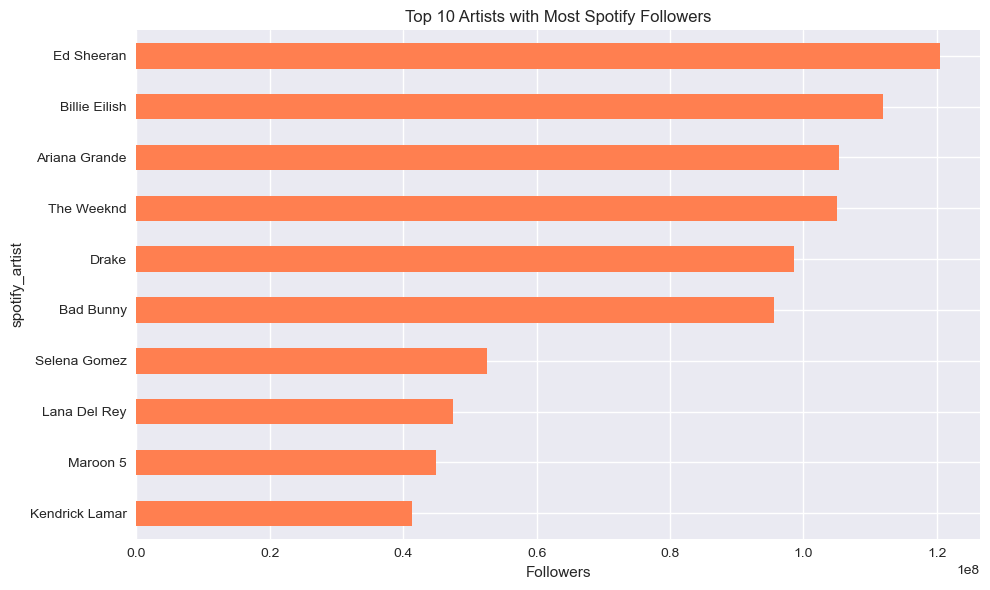

In [41]:
top_artists = df[['spotify_artist', 'artist_followers']].dropna()
top_artists = top_artists.groupby('spotify_artist')['artist_followers'].max().nlargest(10)
top_artists.plot(kind='barh', color='coral', figsize=(10, 6))
plt.title('Top 10 Artists with Most Spotify Followers')
plt.xlabel('Followers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 2. Top 10 Most Frequent Genres

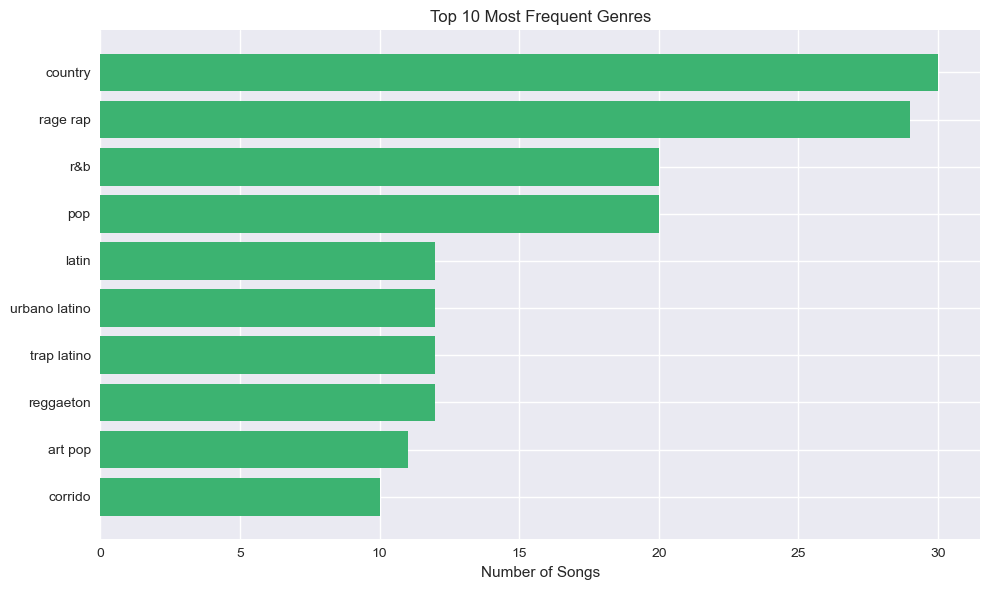

In [46]:
import ast
from collections import Counter

all_genres = []
for genres in df['artist_genres'].dropna():
    for genre in genres.split(','):
        genre = genre.strip().lower()
        if genre != 'unknown':
            all_genres.append(genre)

genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
genre_df = genre_df.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(genre_df['genre'], genre_df['count'], color='mediumseagreen')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Songs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. Artist Popularity vs Spotify Followers

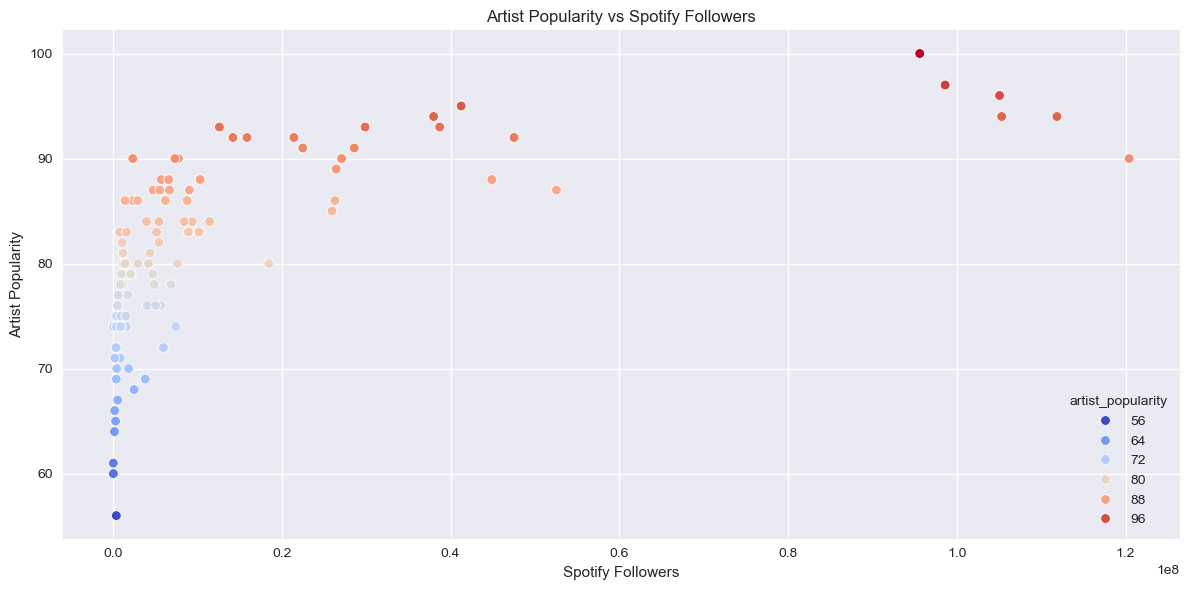

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='artist_followers', y='artist_popularity', hue='artist_popularity', palette='coolwarm')
plt.title('Artist Popularity vs Spotify Followers')
plt.xlabel('Spotify Followers')
plt.ylabel('Artist Popularity')
plt.tight_layout()
plt.show()

## 4. Track Popularity Over Time

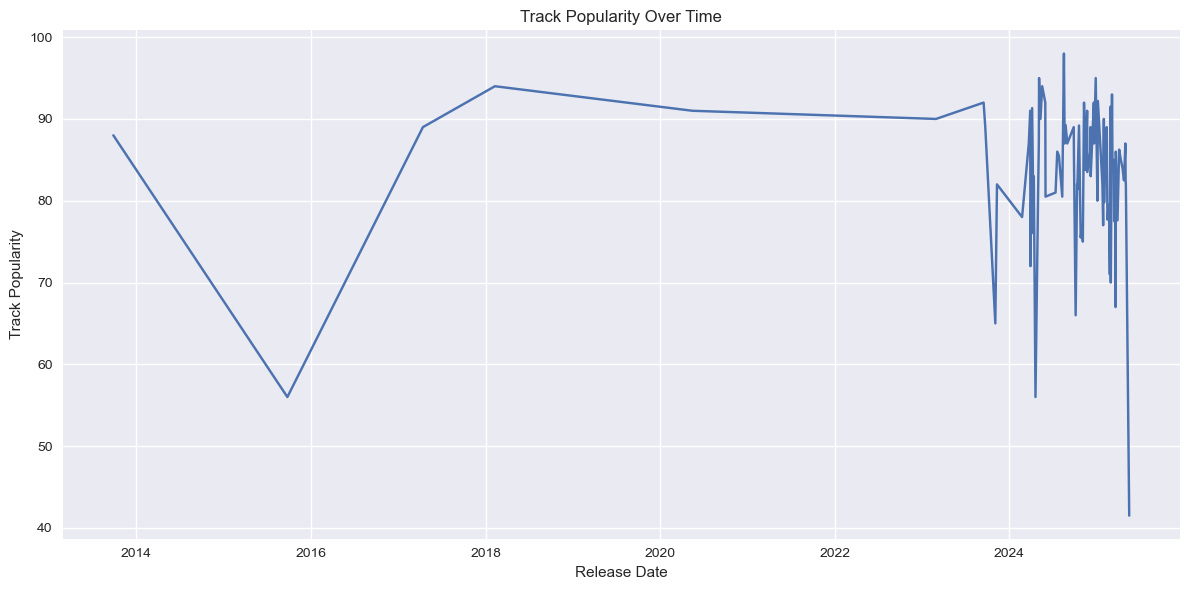

In [53]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.sort_values('release_date', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='track_popularity', errorbar=None)
plt.title('Track Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Track Popularity')
plt.tight_layout()
plt.show()

## 5. Track Popularity by Release Year

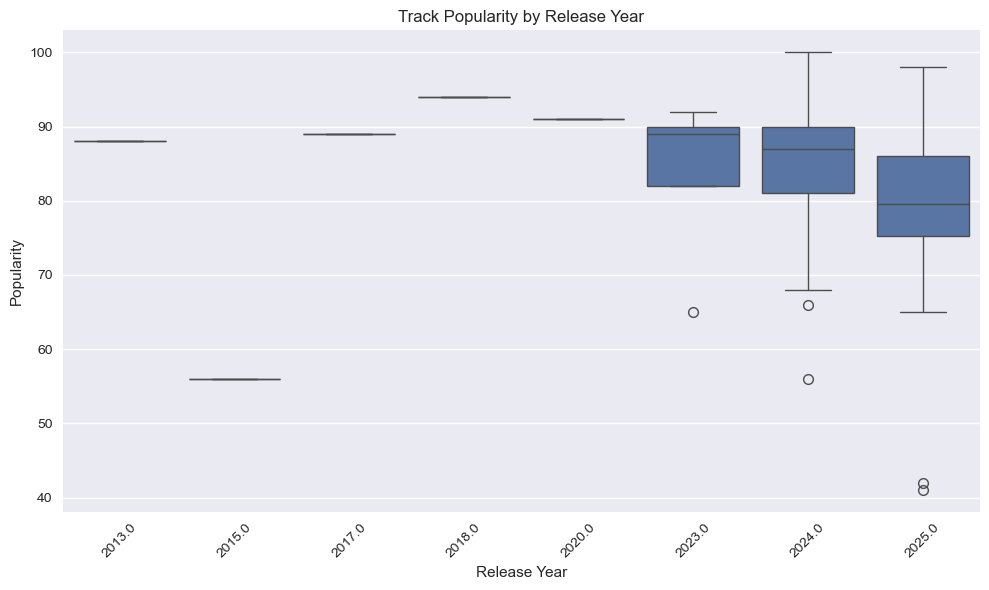

In [58]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='release_year', y='track_popularity')
plt.xticks(rotation=45)
plt.title('Track Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

## 6. Genre Distribution by Popularity Tier

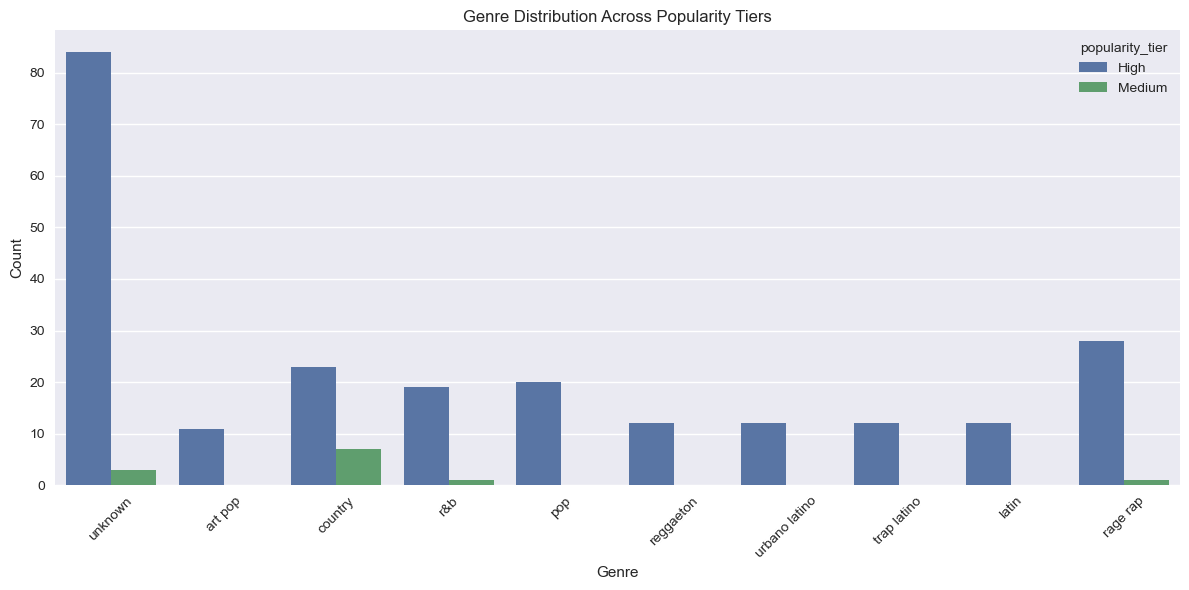

In [63]:
popularity_bins = pd.cut(df['track_popularity'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])
df['popularity_tier'] = popularity_bins

genre_rows = []
for _, row in df[['artist_genres', 'popularity_tier']].dropna().iterrows():
    for genre in row['artist_genres'].split(','):
        genre_rows.append({'genre': genre.strip().lower(), 'popularity_tier': row['popularity_tier']})

genre_df = pd.DataFrame(genre_rows)
top_genres = genre_df['genre'].value_counts().head(10).index
filtered_genre_df = genre_df[genre_df['genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_genre_df, x='genre', hue='popularity_tier')
plt.title('Genre Distribution Across Popularity Tiers')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()